In [1]:
#Importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing sklearn modules
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score,roc_curve, roc_auc_score, auc
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier

In [4]:
# import dataset 
diabetes= pd.read_csv("C:/Users/kezen/OneDrive/Documents/Microsoft/data/diabetes.csv", delimiter=",", header="infer")

# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
x = diabetes[features].values 
y =diabetes[label].values

# split data 70% to training and test dataset: 70% to training and 30% to testing dataset 
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 100) # random_state ensures reproducibility

In [4]:
# Application of all Machine Learning methods
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(("RF", RandomForestClassifier()))
models.append(("GBM", GradientBoostingClassifier()))
models.append(("Ada", AdaBoostClassifier()))



C:\Users\kezen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kezen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR: Mean: 0.78 STD: 0.017392
LDA: Mean: 0.79 STD: 0.010451
KNN: Mean: 0.84 STD: 0.007284
CART: Mean: 0.9 STD: 0.008259
NB: Mean: 0.79 STD: 0.016201
SVM: Mean: 0.81 STD: 0.012742
RF: Mean: 0.94 STD: 0.008179
GBM: Mean: 0.95 STD: 0.005954
Ada: Mean: 0.95 STD: 0.004611


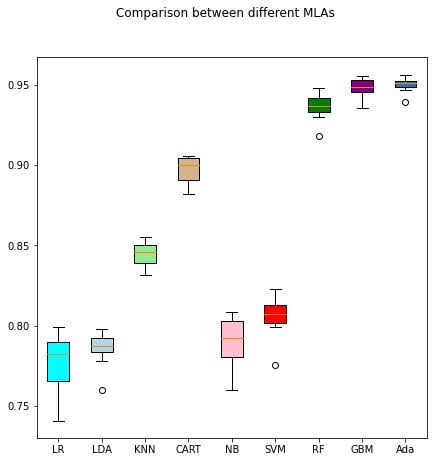

In [5]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state =  None)
	cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	message = f"{name}: Mean: {cv_results.mean().round(2)} STD: {cv_results.std().round(6)}"
	print(message)

# boxplot algorithm comparison
fig = plt.figure(figsize= (7,7))
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
box = plt.boxplot(results, patch_artist= True)
ax.set_xticklabels(names)
colors = ['cyan', 'lightblue', 'lightgreen', 'tan', 'pink', "red", "green", "purple"]
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

Aadaboost is the best performing model with an accuracy rate of 95%- fit the final model using Adaboost

In [5]:
# Application of all Machine Learning methods
MLA = [
    
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
  
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    ]

In [6]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:  
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(accuracy_score(y_test, predicted), 4)
    MLA_compare.loc[row_index, 'Precission'] = round(precision_score(y_test, predicted),4)
    MLA_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted), 4)
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)

    row_index+=1
    
MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
MLA_compare


C:\Users\kezen\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\kezen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,MLA used,Train Accuracy,Test Accuracy,Precission,Recall,AUC
3,GradientBoostingClassifier,0.9569,0.9516,0.9388,0.9137,0.942024
0,AdaBoostClassifier,0.9513,0.9498,0.9295,0.9183,0.941871
2,ExtraTreesClassifier,1.0000,0.9393,0.9213,0.8936,0.927825
4,RandomForestClassifier,1.0000,0.9393,0.9254,0.8889,0.926647
1,BaggingClassifier,0.9945,0.9291,0.9111,0.8715,0.914619
9,DecisionTreeClassifier,1.0000,0.8989,0.8475,0.8481,0.886105
12,KNeighborsClassifier,0.8922,0.8282,0.7555,0.7135,0.799375
5,GaussianProcessClassifier,1.0000,0.8089,0.7122,0.7122,0.784567
7,NuSVC,0.8143,0.8071,0.7583,0.6151,0.758828
6,SVC,0.8101,0.8058,0.7632,0.6017,0.754463


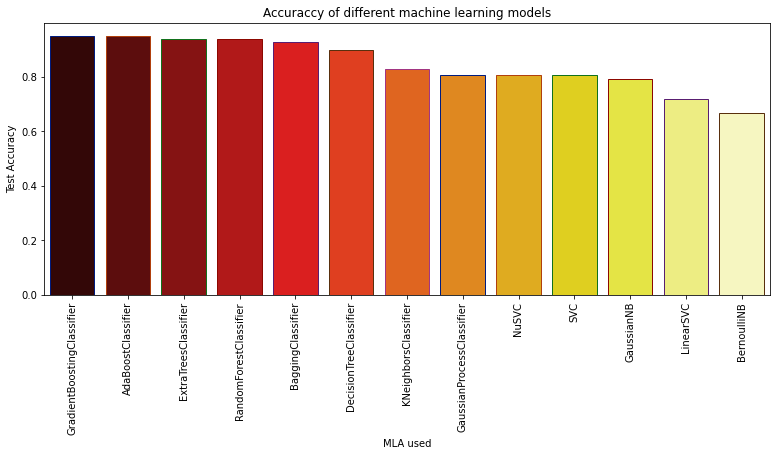

In [7]:
# Creating plot to show the test accuracy
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Accuraccy of different machine learning models')
plt.show()

C:\Users\kezen\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


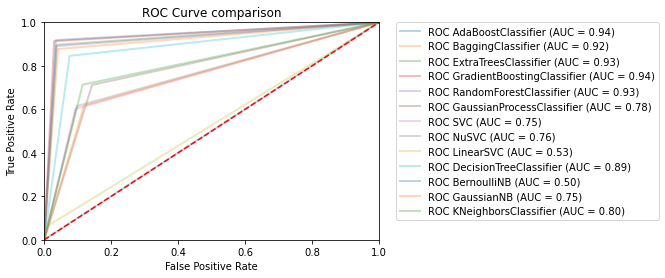

In [8]:
# Creating plot to show the ROC for all MLA
index = 1
for alg in MLA:
    
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()